# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


## 1. Polynomial Regression (Non-linear regression)



### Use case
This project aims to analyze the relationship between interest rates and house prices in Canada to predict future housing trends. Using historical data, we will evaluate how changes in interest rates impact housing prices over time. The analysis will provide actionable insights for real estate investors and policymakers, helping them understand the influence of monetary policy on housing markets and make data-driven decisions. Accurate predictions can improve investment strategies and support sustainable market growth.

Hypothesis:

Null Hypothesis (H₀): Changes in interest rates have no significant effect on house prices.


Alternative Hypothesis (H₁): Changes in interest rates significantly influence house prices.


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 
df = pd.read_csv("melted_data_1120.csv")
print(df.head())

         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price  
0    One_storey  207700  
1    One_storey  208400  
2    One_storey  209200  
3    One_storey  210100  
4    One_storey  210600  


### Implement Pearson's correlation adequately to the purposes and targets of your term project.

In [5]:
import scipy.stats as stats
# Select the relevant columns: Interest Rate and Price
interest_rate = df['Interest Rate']
price = df['price']

# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(interest_rate, price)

# Print the results
print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("We reject H0: and we accept the alternative hypothesis H1. The correlation is statistically significant.")
else:
    print("We cannot reject H0. The correlation is not statistically significant.")

Pearson's Correlation Coefficient: -0.414240558292247
P-Value: 1.3707739815515327e-44
We reject H0: and we accept the alternative hypothesis H1. The correlation is statistically significant.


### Implement Logistic Classification adequately to the purposes and targets of your term project.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Preprocessing: Select relevant columns
df = df[['Interest Rate', 'price']]

# Create a target variable: Categorize prices into "Above Median" (1) and "Below Median" (0)
median_price = df['price'].median()
df['price_category'] = np.where(df['price'] > median_price, 1, 0)

# Define features (X) and target (y)
X = df[['Interest Rate']]
y = df['price_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Interpretation
coefficients = model.coef_
intercept = model.intercept_
print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept}")
df



Accuracy: 0.5668789808917197
Confusion Matrix:
[[ 64  95]
 [ 41 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.40      0.48       159
           1       0.55      0.74      0.63       155

    accuracy                           0.57       314
   macro avg       0.58      0.57      0.56       314
weighted avg       0.58      0.57      0.55       314

Model Coefficients: [[-0.72121433]]
Model Intercept: [1.1626594]


,Interest Rate,price,price_category
0,2.75,207700,0
1,2.75,208400,0
2,2.75,209200,0
3,2.75,210100,0
4,2.75,210600,0
...,...,...,...
1040,0.50,810100,1
1041,0.50,834700,1
1042,0.75,834300,1
1043,1.25,819800,1


### Implement spearman's correlation adequately to the purposes and targets of your term project.

Spearman's Correlation Coefficient: -0.41039412947580445
P-value: 1.0151002048458779e-43
The correlation is statistically significant.


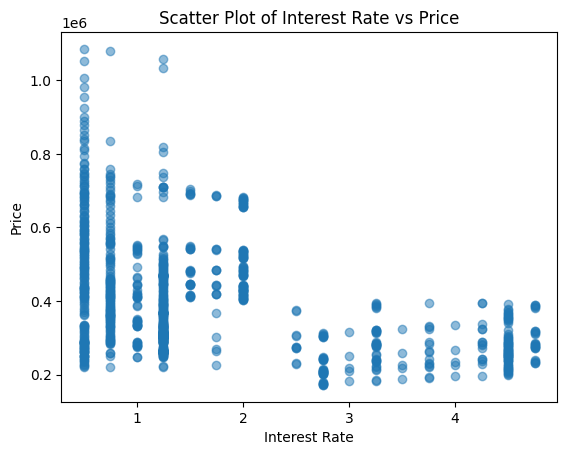

In [8]:
import pandas as pd
from scipy.stats import spearmanr

# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Preprocessing: Select relevant columns
df = df[['Interest Rate', 'price']]

# Check for missing values and drop them if any
df = df.dropna()

# Calculate Spearman's correlation
correlation, p_value = spearmanr(df['Interest Rate'], df['price'])

# Display the results
print(f"Spearman's Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Optional: Visualize the relationship
import matplotlib.pyplot as plt

plt.scatter(df['Interest Rate'], df['price'], alpha=0.5)
plt.title("Scatter Plot of Interest Rate vs Price")
plt.xlabel("Interest Rate")
plt.ylabel("Price")
plt.show()


### Implement Probabilistic Reasoning adequately to the purposes and targets of your term project.

Conditional Probability Table:
Price Category          Very Low       Low  Moderate      High  Very High
Interest Rate Category                                                   
Very Low                0.000000  0.461443  0.399254  0.120647   0.018657
Low                     0.125000  0.875000  0.000000  0.000000   0.000000
Moderate                0.017391  0.982609  0.000000  0.000000   0.000000

Probabilities of price categories for interest rate 'Low':
Price Category
Very Low     0.125
Low          0.875
Moderate     0.000
High         0.000
Very High    0.000
Name: Low, dtype: float64


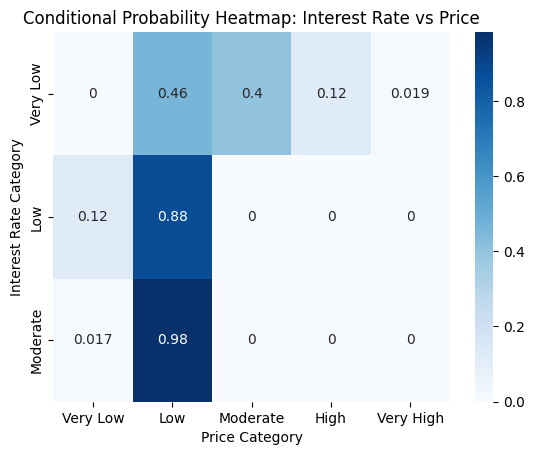

In [9]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("melted_data_1120.csv")

# Preprocessing: Select relevant columns and handle missing values
df = df[['Interest Rate', 'price']].dropna()

# Binning interest rates into categories
bins_interest_rate = [0, 2, 4, 6, 8]  # Example bins for interest rates
labels_interest_rate = ['Very Low', 'Low', 'Moderate', 'High']
df['Interest Rate Category'] = pd.cut(df['Interest Rate'], bins=bins_interest_rate, labels=labels_interest_rate, include_lowest=True)

# Binning house prices into categories
bins_price = [0, 200000, 400000, 600000, 800000, 1000000]  # Example bins for price
labels_price = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
df['Price Category'] = pd.cut(df['price'], bins=bins_price, labels=labels_price, include_lowest=True)

# Calculate conditional probabilities
prob_table = pd.crosstab(df['Interest Rate Category'], df['Price Category'], normalize='index')

# Display the probability table
print("Conditional Probability Table:")
print(prob_table)

# Example: Given an interest rate category, predict the likelihood of each price category
interest_rate_input = 'Low'  # Example input
if interest_rate_input in prob_table.index:
    print(f"\nProbabilities of price categories for interest rate '{interest_rate_input}':")
    print(prob_table.loc[interest_rate_input])
else:
    print(f"No data available for interest rate category '{interest_rate_input}'.")

# Visualize the probability distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(prob_table, annot=True, cmap="Blues")
plt.title("Conditional Probability Heatmap: Interest Rate vs Price")
plt.xlabel("Price Category")
plt.ylabel("Interest Rate Category")
plt.show()


### Trainning the Model

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Independent variables (Population, Median Income) and target variable (price)
X = df[['Population']].values
y = df['price'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
y_pred = model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Summary using statsmodels
# Add a constant to the model for the intercept
X_poly_train_sm = sm.add_constant(X_poly_train)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_poly_train_sm).fit()

# Print the summary
print(model_sm.summary())

Mean Squared Error: 8279924123.303602
R-squared: 0.6259602953654554
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1354.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          7.03e-177
Time:                        08:43:48   Log-Likelihood:                -10778.
No. Observations:                 836   AIC:                         2.156e+04
Df Residuals:                     834   BIC:                         2.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

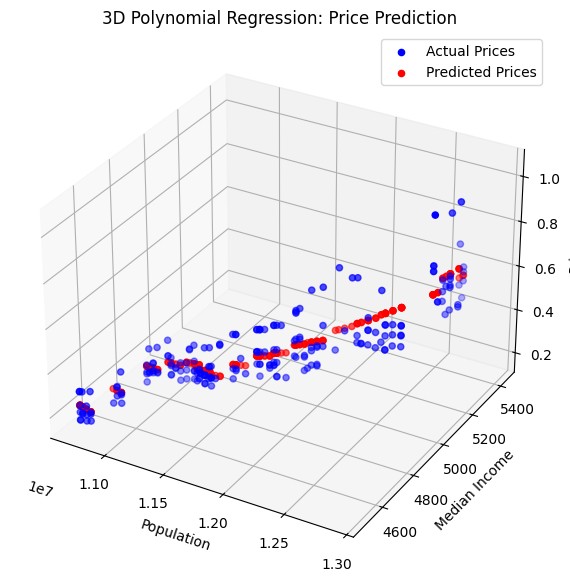

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual Prices')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Predicted Prices')

ax.set_xlabel('Population')
ax.set_ylabel('Median Income')
ax.set_zlabel('Price')
plt.title('3D Polynomial Regression: Price Prediction')
plt.legend()
plt.show()


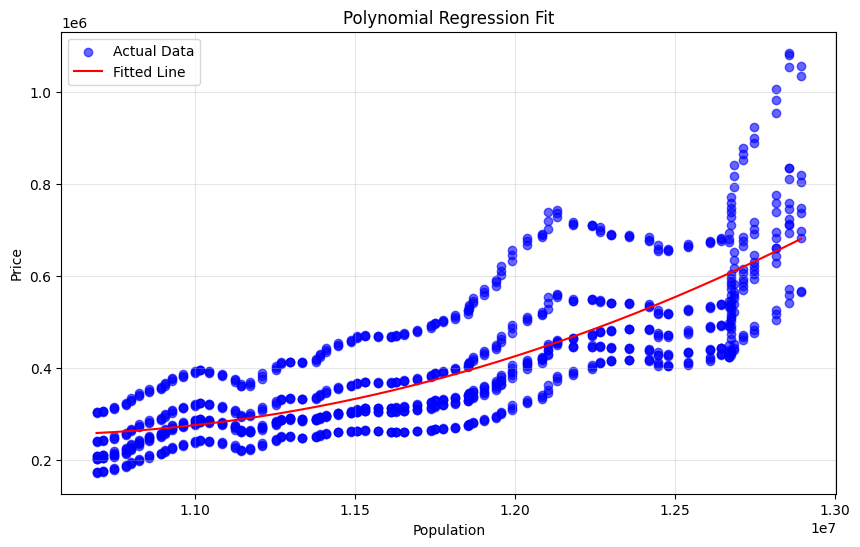

In [17]:
# Plotting the fit line
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)

# Generate predictions for a smooth curve
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)  # Generate evenly spaced values within the range of X
X_poly_range = poly.transform(X_range)  # Transform the range to polynomial features
y_range_pred = model.predict(X_poly_range)  # Predict using the model

# Plot the fitted polynomial regression line
plt.plot(X_range, y_range_pred, color='red', label='Fitted Line')

# Add labels, title, and legend
plt.xlabel('Population')
plt.ylabel('Price')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


Implementing Non-Linear Regression and its Relevance to Predicting Housing Prices in Canada
Predicting housing prices is a complex task due to the intricate relationships between various factors such as socioeconomic and demographic characteristics, as well as economic indicators. A polynomial regression-based machine learning model, a form of non-linear regression, is highly suitable for capturing these relationships, particularly when linear models fail to represent the complexity inherent in housing price trends.

Implementing Non-Linear Regression
Non-linear regression, specifically polynomial regression, extends the capabilities of traditional linear regression by introducing polynomial terms. Instead of modeling the relationship as 𝑦 = 𝛽 0 + 𝛽 1 𝑥 y=β 0 ​ +β 1 ​ x, polynomial regression models it as 𝑦 = 𝛽0 + 𝛽1𝑥 + 𝛽2𝑥2 + … + 𝛽𝑛𝑥𝑛, where 𝑛 n represents the polynomial degree. This allows the model to fit curves to the data, making it adept at modeling non-linear trends.


Steps to Implement Polynomial Regression
Data Preparation: The first step is to preprocess the historical data, ensuring it is cleaned, scaled, and structured for analysis. Key predictors for housing prices include population, median income, and mortgage interest rates. Feature scaling is essential for improving convergence during model training.
Feature Engineering: Polynomial terms (e.g., 𝑥2,𝑥3x 2,x 3
 ) are created for the independent variables, capturing non-linear relationships. Interactions between variables may also be added to account for more complex dependencies, such as how median income and interest rates jointly influence housing prices.
Model Selection and Training: The degree of the polynomial is a crucial hyperparameter. Too low a degree may underfit the data, while a high degree risks overfitting. Cross-validation techniques are used to identify the optimal degree. Libraries like scikit-learn simplify the process of polynomial regression using its PolynomialFeatures and regression modules.
Model Evaluation: Performance is assessed using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. A well-tuned polynomial regression model should generalize well to unseen data.
Addressing Challenges
While polynomial regression is effective for non-linear patterns, challenges such as multicollinearity (arising from polynomial terms) and overfitting must be managed. Regularization techniques, like Ridge or Lasso regression, can address these issues by penalizing large coefficients.

Relevance to the Term Project
The relevance of polynomial regression to this term project lies in its ability to model the non-linear relationships between housing prices and their predictors. For instance:

Population Growth: Housing prices often exhibit exponential increases in areas with rapid population growth, necessitating a model that can capture such trends.
Interest Rates and Income: The impact of mortgage interest rates on housing prices is often non-linear, as affordability thresholds influence buyer behavior. Similarly, the relationship between median income and housing prices can involve diminishing returns.
By incorporating polynomial regression, the project can provide a more nuanced understanding of housing market dynamics in Canada over the past 20 years. This is critical for both accuracy in predictions and interpretability of results, as policymakers, investors, and stakeholders rely on these insights to make informed decisions.

Advantages and Broader Applications
Implementing polynomial regression demonstrates the project’s ability to handle complex real-world data effectively. Beyond this project, the techniques developed are transferable to other domains, such as predicting sales growth, energy consumption, or healthcare outcomes. The experience gained from fine-tuning the model, interpreting results, and handling challenges like overfitting and multicollinearity will provide valuable skills applicable across various machine learning applications.

Conclusion
Non-linear regression, implemented via polynomial regression, is a crucial component of this term project on predicting Canadian housing prices. It aligns well with the project's objectives by accurately capturing the non-linear relationships between predictors and outcomes. This approach ensures meaningful, actionable insights, making it a vital tool for tackling real-world challenges in data-driven decision-making.

 ### 2.  Logistic Regression

### Use Case
Predicting Price Categories (low, medium, high) of Properties in Canada Based on Macroeconomic Factors like 'Median income', 'Population', 'Mortgage Rate', 'Interest Rate' using a logistic regression supervised learning model that analyzes 20 years of economic and real estate market data.





Logistic Regression and Its Relevance to Predicting Property Price Categories in Canada
Logistic regression is a crucial tool for addressing classification problems, making it particularly relevant to this term project, which focuses on predicting property price categories (low, medium, high) in Canada based on macroeconomic factors. By analyzing 20 years of data, including variables such as median income, population, mortgage rates, and interest rates, logistic regression offers a robust framework to uncover patterns in the housing market and provide actionable insights.

A Tool for Classification
The primary objective of this project is to classify properties into distinct categories, making logistic regression an inherently relevant choice. Unlike linear regression, which predicts continuous values, logistic regression is designed to handle categorical outcomes. By applying a multinomial logistic regression model, the probabilities for multiple classes—low, medium, and high—are calculated. This allows the model to assign each property to the category it is most likely to belong to, based on the underlying macroeconomic data.

This classification ability aligns with the project’s goal of providing stakeholders, such as real estate professionals, financial analysts, and policymakers, with actionable insights. For example, it enables stakeholders to identify which demographic and economic factors have the most influence on properties falling into higher or lower price tiers, a critical aspect for market segmentation and policy development.


Interpretable Insights
One of the strongest advantages of logistic regression is its interpretability, which is highly beneficial for understanding the factors driving housing prices. Unlike complex machine learning models like neural networks or ensemble methods, logistic regression provides clear and interpretable coefficients. These coefficients indicate the direction and strength of the relationship between each independent variable (e.g., median income or interest rates) and the likelihood of a property being categorized into a specific price segment. For example, a positive coefficient for median income would suggest that higher incomes are associated with higher property price categories. This interpretability ensures that the results can be easily communicated to stakeholders, including policymakers, real estate analysts, and financial institutions.

Handling Macroeconomic Data
Logistic regression’s relevance also lies in its ability to work effectively with structured datasets like those used in this project. Macroeconomic data often exhibit linear or slightly non-linear relationships, which logistic regression can handle efficiently. Moreover, its statistical foundation makes it well-suited for analyzing economic trends, as it accounts for how individual factors interact to influence categorical outcomes. For instance, the model can analyze how population growth in specific regions impacts housing affordability, which is a critical concern in the Canadian housing market.

Efficiency and Scalability
Another reason for the relevance of logistic regression is its computational efficiency. Given that this term project involves 20 years of historical data, logistic regression provides a scalable solution for analyzing large datasets without requiring extensive computational resources. This efficiency is particularly important for projects that aim to generate results within a limited timeframe while maintaining accuracy and reliability.

Real-World Applicability
Logistic regression is widely used in fields such as economics, finance, and real estate, where understanding categorical outcomes is essential. Its application in this term project bridges the gap between data-driven modeling and real-world insights. For instance, predicting property price categories can inform government housing policies, help financial institutions assess mortgage risks, and guide real estate developers in identifying high-demand areas. By using logistic regression, the project aligns with methodologies already trusted in industry and research, enhancing its practical relevance.

Conclusion
Logistic regression is a highly relevant model for this term project due to its focus on classification, interpretability, and efficiency. By leveraging 20 years of macroeconomic data, it provides a powerful framework for understanding the factors influencing property price categories in Canada. Its applicability to real-world problems ensures that the insights generated are not only theoretically sound but also practical for stakeholders in the housing market. This makes logistic regression a foundational tool for achieving the project's goals of uncovering actionable trends in the Canadian real estate sector.








### Prepare the dataset

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("melted_data_1120.csv")

bins = [0, 200000, 210000, 220000, float('inf')]
labels = ['low', 'medium', 'high', 'very_high']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

print(df.head())


         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price price_category  
0    One_storey  207700         medium  
1    One_storey  208400         medium  
2    One_storey  209200         medium  
3    One_storey  210100           high  
4    One_storey  210600           high  


In [8]:
print(df.head())

         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price price_category  
0    One_storey  207700         medium  
1    One_storey  208400         medium  
2    One_storey  209200         medium  
3    One_storey  210100           high  
4    One_storey  210600           high  


In [9]:
print(df.dtypes)


Date                object
Median income      float64
Population         float64
Mortgage Rate      float64
Interest Rate      float64
property_type       object
price                int64
price_category    category
dtype: object


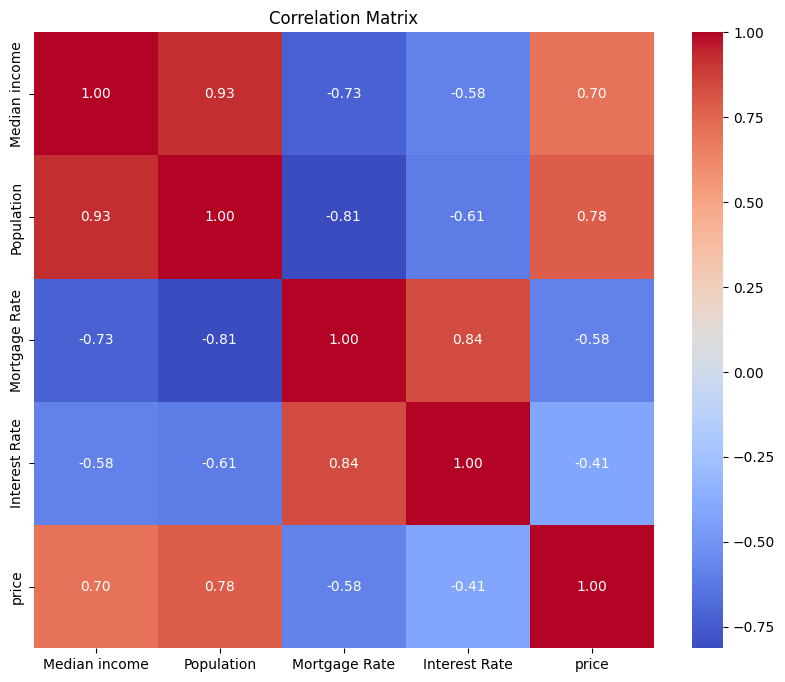

In [10]:
# Filter only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix only for numeric columns
corr_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



### Training the model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Split the data into training and testing sets (80% training, 20% testing)
X = df[['Median income', 'Population', 'Mortgage Rate']]  # Make sure these columns exist in your DataFrame
y = df['price_category']

# Encode the target variable 'price_category' to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Add a constant to the model for the intercept term
X_train = sm.add_constant(X_train)

# Fit the multinomial logistic regression model with the training data
logit_model = sm.MNLogit(y_train, X_train)
result = logit_model.fit()

# Display the model summary
print(result.summary())

# If you want to make predictions on the test data, you can do it like this:
X_test = sm.add_constant(X_test)
predictions = result.predict(X_test)






Optimization terminated successfully.
         Current function value: 0.108221
         Iterations 14
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  836
Model:                        MNLogit   Df Residuals:                      824
Method:                           MLE   Df Model:                            9
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.5071
Time:                        08:31:50   Log-Likelihood:                -90.473
converged:                       True   LL-Null:                       -183.57
Covariance Type:            nonrobust   LLR p-value:                 2.573e-35
          y=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           100.8760     80.773      1.249      0.212     -57.437     259.188
Median income     0

AUC: 0.9566402542198011


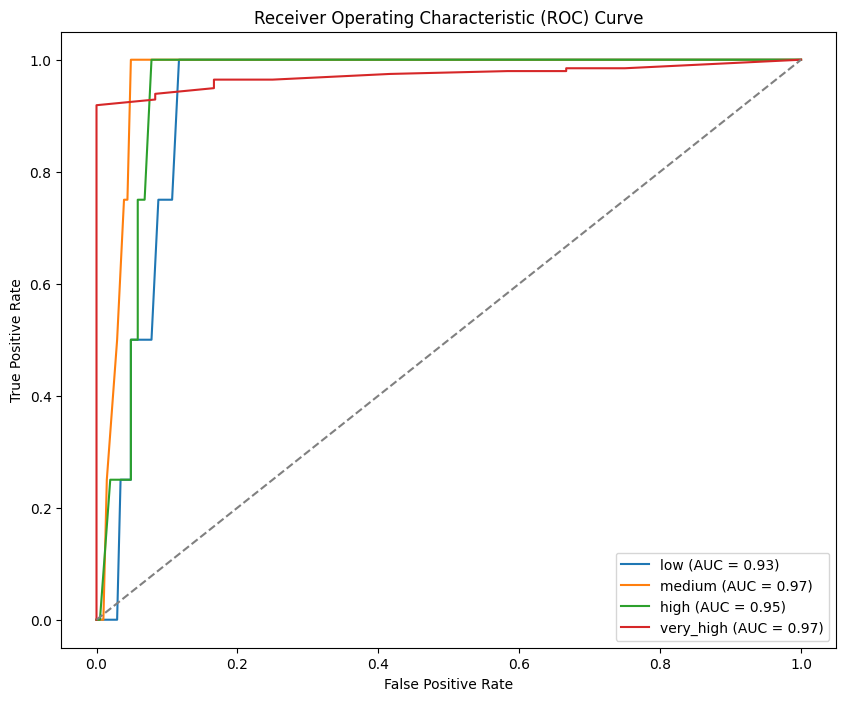

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the labels
labels = ['low', 'medium', 'high', 'very_high']

# Make probability predictions for each class using the test data
y_pred_prob = result.predict(X_test)

# Convert y_pred_prob to a NumPy array if it's a DataFrame
y_pred_prob = np.array(y_pred_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f"AUC: {auc}")

# Plot the ROC curve for each class
n_classes = len(labels)  # Number of unique classes

# Create the plot
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    # Get false positive rate and true positive rate for each class
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])  
    # Use label names in the legend
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc_score(y_test == i, y_pred_prob[:, i]):.2f})')

# Plot a diagonal line representing a random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


True Positive Rate (TPR): Also known as sensitivity or recall, it measures how well the model correctly identifies positive instances for a specific class. It is plotted on the y-axis.
​ 
False Positive Rate (FPR): It measures the proportion of negative instances incorrectly classified as positive. It is plotted on the x-axis.

Diagonal Line: The dashed diagonal line represents a random classifier, which predicts without using any meaningful patterns (e.g., flipping a coin). A curve closer to the top-left corner indicates better performance, as the model achieves a higher TPR with a lower FPR.

AUC (Area Under the Curve): The AUC value indicates the model's ability to distinguish between the positive and negative instances for each class. An AUC of 1.0 represents perfect classification, while an AUC of 0.5 indicates random guessing.

Interpretation of This Graph:
Class 0 (Blue Curve, AUC = 0.93): The model performs well for Class 0, with an AUC of 0.93, indicating strong predictive capability.
Class 1 (Orange Curve, AUC = 0.97): The model performs exceptionally well for Class 1, as the curve is very close to the top-left corner and the AUC is 0.97.
Class 2 (Green Curve, AUC = 0.95): For Class 2, the model is also highly effective, with an AUC of 0.95, showing good separation between positive and negative cases.
Class 3 (Red Curve, AUC = 0.97): The model achieves an AUC of 0.97 for Class 3, indicating very strong performance. 

Overall Performance:
The model performs well for all classes, as the AUC values are above 0.90 for each class. This suggests that the classifier is effective at distinguishing between the property price categories, assuming the data in this context pertains to multi-class classification.

In summary, the ROC curve and AUC values demonstrate the model's ability to classify data accurately for each class, with minimal errors in distinguishing between categories.








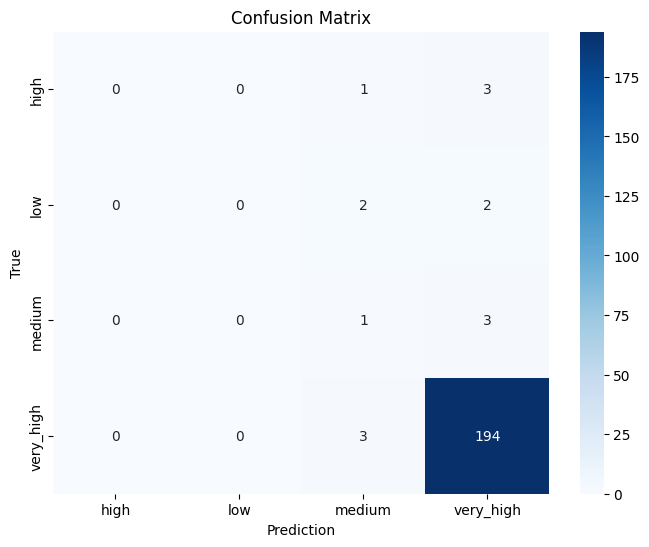

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Make probability predictions for each class using the test data
y_pred_prob = result.predict(X_test)  # Probability predictions for each class

# For multiclass classification, select the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()




This is a Confusion Matrix, which provides a summary of prediction results for a multi-class classification model. It compares the model's predicted labels (x-axis) against the actual (true) labels (y-axis). Here's the analysis of the matrix:

Key Observations:
Axes:

True Labels (y-axis): The actual classes of the data points.
Categories: high, low, medium, very_high.  
Predicted Labels (x-axis): The classes predicted by the model. 

Diagonal Values:
These represent the correct predictions (where the true label matches the predicted label).
The value 194 in the bottom-right corner indicates that 194 instances of the very_high category were correctly classified.  
Off-Diagonal Values:
These represent misclassifications, where the model's prediction differs from the actual class. Examples include:
3 instances of very_high were misclassified as medium.
2 instances of low were incorrectly predicted as medium.

Overall Accuracy:
The model is highly accurate for the very_high category, as it correctly predicts most instances (194 out of 200+ total observations).
However, the model struggles with the other categories (high, low, and medium), as seen by the small number of correct predictions and the distribution of errors.  

Strengths and Weaknesses:  
Strength:
The model performs exceptionally well for the very_high class, possibly due to the class being well-represented in the training data or having distinct features.  
Weakness:
The poor classification performance for high, low, and medium suggests class imbalance or overlapping feature distributions among these categories.
Potential Improvements:
Addressing Class Imbalance:

Since the dataset has significantly more very_high instances than the other categories, resampling techniques like oversampling (SMOTE) or undersampling may improve performance.

Feature Engineering:
Adding or refining features that better distinguish between high, low, and medium categories may help improve classification accuracy.
Model Choice:


Conclusion:
The confusion matrix reveals that while the model performs well for the very_high category, it needs improvement in correctly classifying high, low, and medium categories. A combination of data balancing, feature engineering, and potential model adjustment could lead to better overall performance.

In [14]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy using the true labels and the predictions on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 0.9330143540669856


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each class using the test data
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



Precision: 0.9079877912603291
Recall: 0.9330143540669856
F1-score: 0.9200774881963498


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
